this is experimental seeing if i can get the accuracy to improve

Loss actually tracks the inverse-confidence (for want of a better word) of the prediction. A high Loss score indicates that, even when the model is making good predictions, it is less sure of the predictions it is making...and vice-versa.

In [1]:
#importing tenserflow to create the neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LeakyReLU
import pandas as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
data = p.read_csv('.\clean_data\creditcard_application_clean_data.csv')
train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

smote = SMOTE(random_state=31)
x_train_s, y_train_s = smote.fit_resample(x_train,y_train)

# ros = RandomOverSampler(random_state=42)
# X_train_r, y_train_r = ros.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train_s))


In [3]:
def printGraph(title, hist, leg_loc='lower right'):
    acc = hist.history['accuracy']
    val = hist.history['val_accuracy']
    loss = hist.history['loss']
    loss_val = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)
 
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.plot(epochs, loss_val, ':', label='Validation loss')
    plt.plot(epochs, loss, '-', label="Loss")
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc=leg_loc)
    plt.grid(linestyle='-',  color='black', visible=True)
    plt.plot()
    print("ACCURACY:        ", acc[-1], "\nVAL ACCURACY:    ", val[-1], "\nVAL LOSS:        ", loss_val[-1] )

def printConfusionMatrix(model, X_test, Y_test, name='model'):
    y_predicted = model.predict(X_test) > 0.5
    mat = confusion_matrix(Y_test, y_predicted)
    labels = ['ACCEPTED', 'DENIED']
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

    plt.title(name + " confusion_matrix ")
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

In [4]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
model_3_a = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer_A"),
        layers.Dense(32, activation="relu", name="layer_B"),
        layers.Dense(32, activation="relu", name="layer_C"),
        layers.Dense(32, activation="relu", name="layer_D"),
        layers.Dense(32, activation="relu", name="layer_E"),
        layers.Dense(32, activation="relu", name="layer_F"),
        layers.Dense(32, activation="relu", name="layer_G"),
        layers.Dense(1, activation="sigmoid")
    ]
)
model_3_b = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer_A"),
        layers.Dense(16, activation="relu", name="layer_B"),
        layers.Dense(8, activation="relu", name="layer_C"),
        layers.Dense(16, activation="relu", name="layer_D"),
        layers.Dense(32, activation="relu", name="layer_E"),
        layers.Dense(16, activation="relu", name="layer_F"),
        layers.Dense(8, activation="relu", name="layer_G"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#is the best perfoming one out of the many
#3 hidden layers
model_3_c_1 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(1, activation="sigmoid")
    ]
)
# from the 3 c models, model 2 was the best performing
#5 hidden layers
model_3_c_2 = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(1, activation="sigmoid")
    ]
)
#5 hidden layers
model_3_c_2_leaky = keras.Sequential(
    [
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_A"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_B"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_C"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_D"),
        layers.Dense(256, activation=keras.layers.LeakyReLU(), name="layer_E"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#has 6 hidden layers
model_3_c_2_a = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(1, activation="sigmoid")
    ]
)
#has 9 hidden layers
model_3_c_2_b = keras.Sequential(
    [
        layers.Dense(256, activation="relu", name="layer_A"),
        layers.Dense(256, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(256, activation="relu", name="layer_D"),
        layers.Dense(256, activation="relu", name="layer_E"),
        layers.Dense(256, activation="relu", name="layer_F"),
        layers.Dense(256, activation="relu", name="layer_G"),
        layers.Dense(256, activation="relu", name="layer_H"),
        layers.Dense(256, activation="relu", name="layer_I"),
        layers.Dense(1, activation="sigmoid")
    ]
)

#4 hidden layers with many nodes
model_3_c_3 = keras.Sequential(
    [
        layers.Dense(512, activation="relu", name="layer_A"),
        layers.Dense(512, activation="relu", name="layer_B"),
        layers.Dense(256, activation="relu", name="layer_C"),
        layers.Dense(64, activation="relu", name="layer_D"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model_3_a.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_b.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model_3_c_2_leaky.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2_a.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model_3_c_2_b.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model_3_c_3.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [5]:
#fiting the first NN
hist_a = model_3_a.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 2s 2ms/step - loss: 0.6908 - accuracy: 0.5294 - val_loss: 0.7108 - val_accuracy: 0.3954
Epoch 2/200
402/402 [==============================] - 1s 2ms/step - loss: 0.6843 - accuracy: 0.5486 - val_loss: 0.6423 - val_accuracy: 0.5455
Epoch 3/200
402/402 [==============================] - 1s 2ms/step - loss: 0.6767 - accuracy: 0.5622 - val_loss: 0.7115 - val_accuracy: 0.4019
Epoch 4/200
402/402 [==============================] - 1s 2ms/step - loss: 0.6720 - accuracy: 0.5711 - val_loss: 0.7192 - val_accuracy: 0.3882
Epoch 5/200
402/402 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.5785 - val_loss: 0.6795 - val_accuracy: 0.4805
Epoch 6/200
402/402 [==============================] - 1s 2ms/step - loss: 0.6631 - accuracy: 0.5802 - val_loss: 0.6582 - val_accuracy: 0.5693
Epoch 7/200
402/402 [==============================] - 1s 2ms/step - loss: 0.6599 - accuracy: 0.5858 - val_loss: 0.6281 - val_accuracy: 0.6533

ACCURACY:         0.7165707945823669 
VAL ACCURACY:     0.6747120022773743 
VAL LOSS:         0.6074888110160828


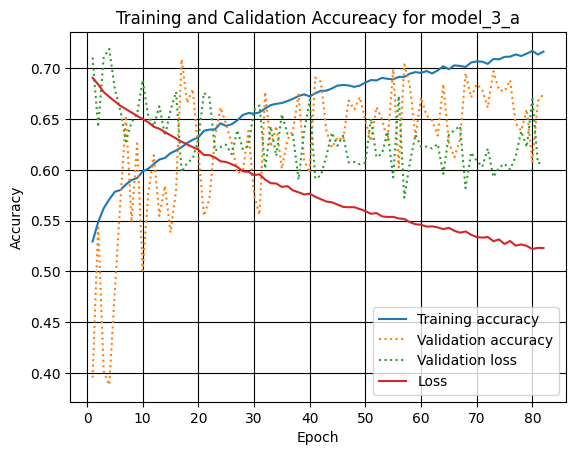

In [6]:
printGraph("Training and Calidation Accureacy for model_3_a", hist_a)

228/228 [==============================] - 0s 1ms/step


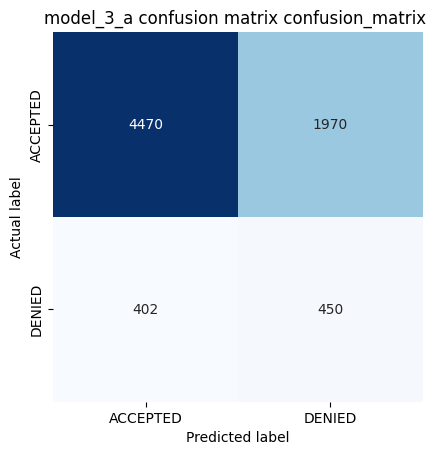

In [7]:
printConfusionMatrix(model_3_a,x_test,y_test,name="model_3_a confusion matrix")

In [8]:
hist_b = model_3_b.fit(x_train_s,y_train_s, epochs=50, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
402/402 [==============================] - 2s 2ms/step - loss: 0.6925 - accuracy: 0.5141 - val_loss: 0.6985 - val_accuracy: 0.4813
Epoch 2/50
402/402 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5396 - val_loss: 0.6305 - val_accuracy: 0.6842
Epoch 3/50
402/402 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.5501 - val_loss: 0.6897 - val_accuracy: 0.4586
Epoch 4/50
402/402 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.5566 - val_loss: 0.6576 - val_accuracy: 0.5073
Epoch 5/50
402/402 [==============================] - 1s 2ms/step - loss: 0.6763 - accuracy: 0.5626 - val_loss: 0.6236 - val_accuracy: 0.6720
Epoch 6/50
402/402 [==============================] - 1s 2ms/step - loss: 0.6744 - accuracy: 0.5644 - val_loss: 0.7083 - val_accuracy: 0.4236
Epoch 7/50
402/402 [==============================] - 1s 2ms/step - loss: 0.6712 - accuracy: 0.5708 - val_loss: 0.6465 - val_accuracy: 0.6363
Epoch 

ACCURACY:         0.6007540822029114 
VAL ACCURACY:     0.49437740445137024 
VAL LOSS:         0.6869668960571289


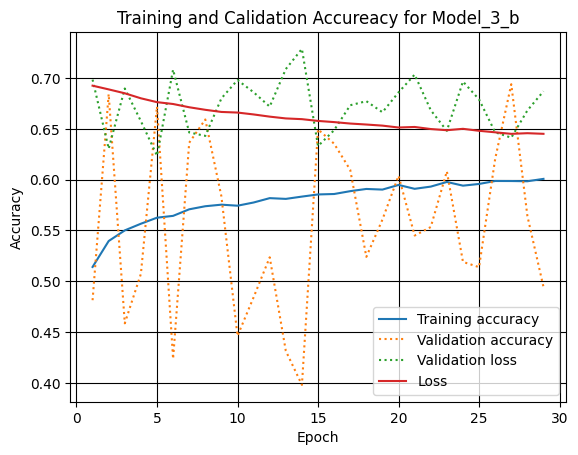

In [9]:
printGraph("Training and Calidation Accureacy for Model_3_b", hist_b)

228/228 [==============================] - 0s 955us/step


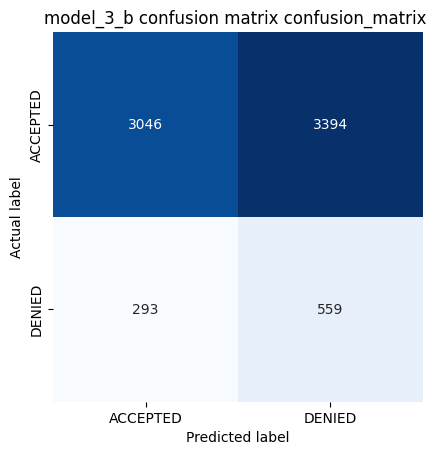

In [10]:
printConfusionMatrix(model_3_b,x_test,y_test,name="model_3_b confusion matrix")

In [11]:
hist_c = model_3_c_1.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 2s 3ms/step - loss: 0.6886 - accuracy: 0.5331 - val_loss: 0.7128 - val_accuracy: 0.4124
Epoch 2/200
402/402 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.5537 - val_loss: 0.6715 - val_accuracy: 0.5266
Epoch 3/200
402/402 [==============================] - 1s 3ms/step - loss: 0.6735 - accuracy: 0.5661 - val_loss: 0.7148 - val_accuracy: 0.3760
Epoch 4/200
402/402 [==============================] - 1s 3ms/step - loss: 0.6679 - accuracy: 0.5773 - val_loss: 0.6376 - val_accuracy: 0.5819
Epoch 5/200
402/402 [==============================] - 1s 3ms/step - loss: 0.6617 - accuracy: 0.5857 - val_loss: 0.6513 - val_accuracy: 0.5122
Epoch 6/200
402/402 [==============================] - 1s 3ms/step - loss: 0.6547 - accuracy: 0.5915 - val_loss: 0.5983 - val_accuracy: 0.6876
Epoch 7/200
402/402 [==============================] - 1s 3ms/step - loss: 0.6488 - accuracy: 0.5976 - val_loss: 0.7110 - val_accuracy: 0.4564

ACCURACY:         0.7922140955924988 
VAL ACCURACY:     0.7268239259719849 
VAL LOSS:         0.5966776609420776


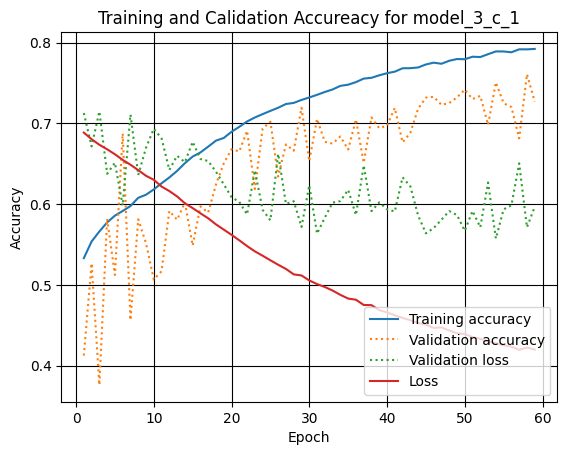

In [12]:
printGraph("Training and Calidation Accureacy for model_3_c_1", hist_c)

228/228 [==============================] - 0s 1ms/step


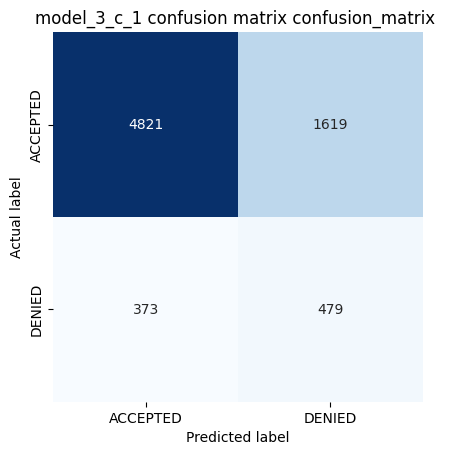

In [13]:
printConfusionMatrix(model_3_c_1,x_test,y_test,name="model_3_c_1 confusion matrix")

In [14]:
hist_c_2 = model_3_c_2.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 3s 5ms/step - loss: 0.6898 - accuracy: 0.5265 - val_loss: 0.7182 - val_accuracy: 0.3051
Epoch 2/200
402/402 [==============================] - 2s 4ms/step - loss: 0.6813 - accuracy: 0.5523 - val_loss: 0.6684 - val_accuracy: 0.4536
Epoch 3/200
402/402 [==============================] - 2s 4ms/step - loss: 0.6739 - accuracy: 0.5680 - val_loss: 0.7353 - val_accuracy: 0.4070
Epoch 4/200
402/402 [==============================] - 2s 4ms/step - loss: 0.6687 - accuracy: 0.5754 - val_loss: 0.6493 - val_accuracy: 0.5565
Epoch 5/200
402/402 [==============================] - 2s 4ms/step - loss: 0.6630 - accuracy: 0.5809 - val_loss: 0.6324 - val_accuracy: 0.5638
Epoch 6/200
402/402 [==============================] - 2s 4ms/step - loss: 0.6557 - accuracy: 0.5906 - val_loss: 0.6583 - val_accuracy: 0.6251
Epoch 7/200
402/402 [==============================] - 2s 4ms/step - loss: 0.6483 - accuracy: 0.5970 - val_loss: 0.6790 - val_accuracy: 0.5848

ACCURACY:         0.836896538734436 
VAL ACCURACY:     0.7452002167701721 
VAL LOSS:         0.7210333347320557


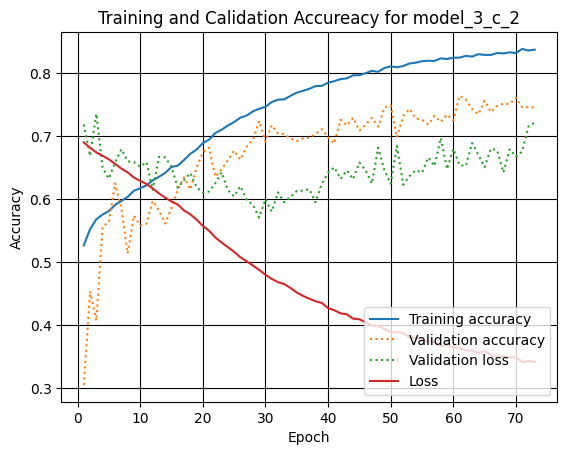

In [15]:
printGraph("Training and Calidation Accureacy for model_3_c_2", hist_c_2)

228/228 [==============================] - 0s 1ms/step


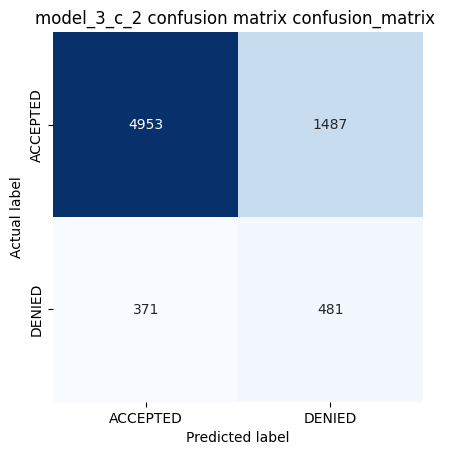

In [16]:
printConfusionMatrix(model_3_c_2,x_test,y_test,name="model_3_c_2 confusion matrix")

In [17]:
hist_c_3 = model_3_c_3.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 4s 8ms/step - loss: 0.6899 - accuracy: 0.5306 - val_loss: 0.6722 - val_accuracy: 0.5215
Epoch 2/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6812 - accuracy: 0.5553 - val_loss: 0.7007 - val_accuracy: 0.4314
Epoch 3/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6733 - accuracy: 0.5694 - val_loss: 0.6559 - val_accuracy: 0.6452
Epoch 4/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6655 - accuracy: 0.5795 - val_loss: 0.6633 - val_accuracy: 0.5996
Epoch 5/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6574 - accuracy: 0.5904 - val_loss: 0.6499 - val_accuracy: 0.5694
Epoch 6/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6509 - accuracy: 0.5959 - val_loss: 0.6571 - val_accuracy: 0.5483
Epoch 7/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6439 - accuracy: 0.6038 - val_loss: 0.6681 - val_accuracy: 0.5140

ACCURACY:         0.8392482399940491 
VAL ACCURACY:     0.7615194916725159 
VAL LOSS:         0.6305806040763855


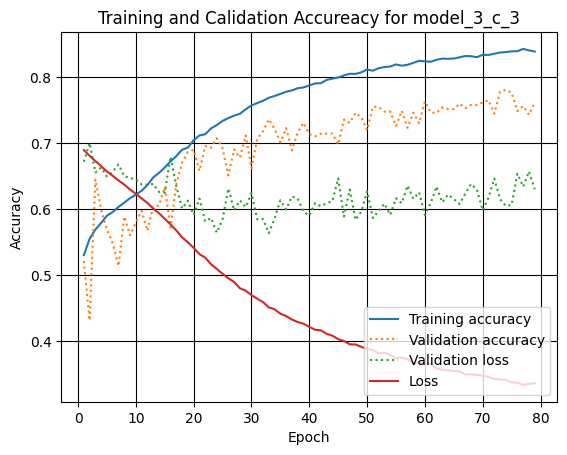

In [18]:
printGraph("Training and Calidation Accureacy for model_3_c_3", hist_c_3)

228/228 [==============================] - 1s 2ms/step


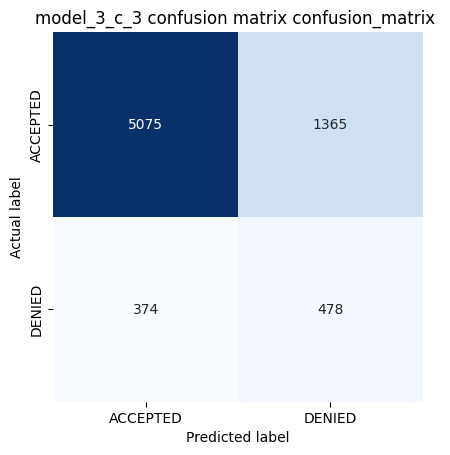

In [19]:

printConfusionMatrix(model_3_c_3,x_test,y_test,name="model_3_c_3 confusion matrix")

=============================================================================================================================================================


From the previous runs, model_3_c_2 was the best performing 

(this was from a previous run, may be diffrent than final run)

loss: 0.3392 - accuracy: 0.8387 - val_loss: 0.7488 - val_accuracy: 0.7408

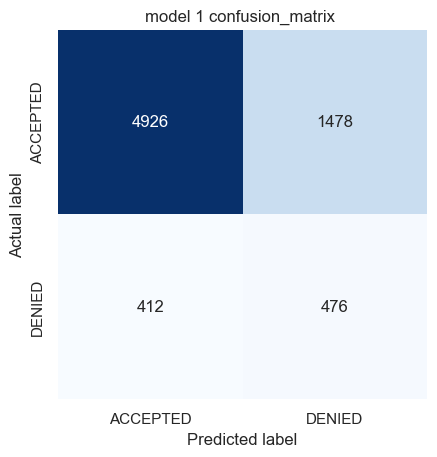




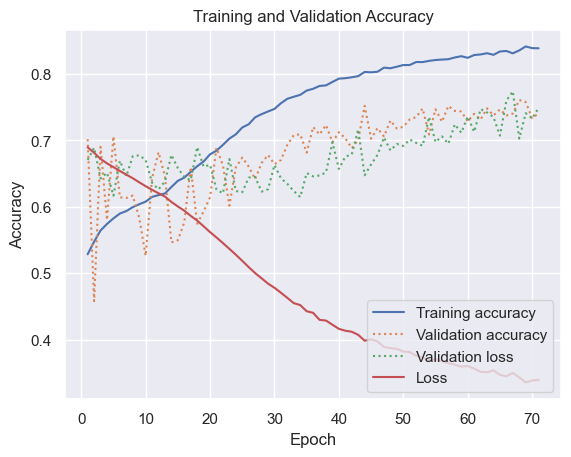

=================================================================================================================================================================

In [20]:
#testing with diffrent activation method, changed from relu to leaky relu
hist_leaky = model_3_c_2_leaky.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 3s 5ms/step - loss: 0.6914 - accuracy: 0.5259 - val_loss: 0.6527 - val_accuracy: 0.7914
Epoch 2/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6882 - accuracy: 0.5364 - val_loss: 0.7362 - val_accuracy: 0.3803
Epoch 3/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6844 - accuracy: 0.5476 - val_loss: 0.6667 - val_accuracy: 0.7807
Epoch 4/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6811 - accuracy: 0.5537 - val_loss: 0.7127 - val_accuracy: 0.4320
Epoch 5/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6783 - accuracy: 0.5596 - val_loss: 0.6814 - val_accuracy: 0.5372
Epoch 6/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6747 - accuracy: 0.5652 - val_loss: 0.6752 - val_accuracy: 0.5994
Epoch 7/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6711 - accuracy: 0.5700 - val_loss: 0.6799 - val_accuracy: 0.4446

ACCURACY:         0.7669283747673035 
VAL ACCURACY:     0.7180472016334534 
VAL LOSS:         0.5812641978263855


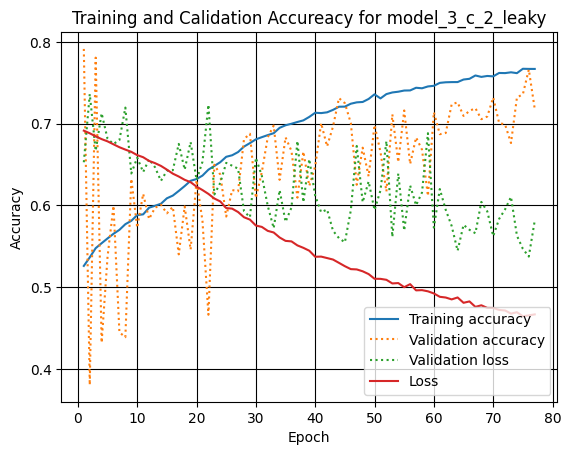

In [21]:
printGraph("Training and Calidation Accureacy for model_3_c_2_leaky", hist_leaky)

228/228 [==============================] - 0s 1ms/step


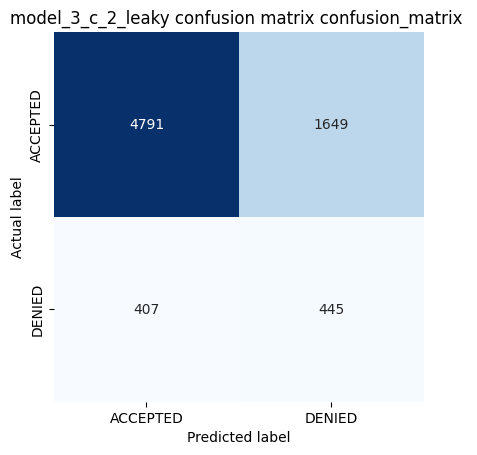

In [22]:
printConfusionMatrix(model_3_c_2_leaky,x_test,y_test,name="model_3_c_2_leaky confusion matrix")

In [23]:
hist = model_3_c_2_a.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 3s 5ms/step - loss: 0.6907 - accuracy: 0.5222 - val_loss: 0.7273 - val_accuracy: 0.2422
Epoch 2/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6829 - accuracy: 0.5487 - val_loss: 0.6779 - val_accuracy: 0.5287
Epoch 3/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6761 - accuracy: 0.5627 - val_loss: 0.7334 - val_accuracy: 0.3951
Epoch 4/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6693 - accuracy: 0.5724 - val_loss: 0.7032 - val_accuracy: 0.4626
Epoch 5/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6622 - accuracy: 0.5816 - val_loss: 0.6615 - val_accuracy: 0.5823
Epoch 6/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6558 - accuracy: 0.5915 - val_loss: 0.6068 - val_accuracy: 0.6489
Epoch 7/200
402/402 [==============================] - 2s 5ms/step - loss: 0.6500 - accuracy: 0.5958 - val_loss: 0.6097 - val_accuracy: 0.7035

ACCURACY:         0.8229029178619385 
VAL ACCURACY:     0.7465716004371643 
VAL LOSS:         0.6649408340454102


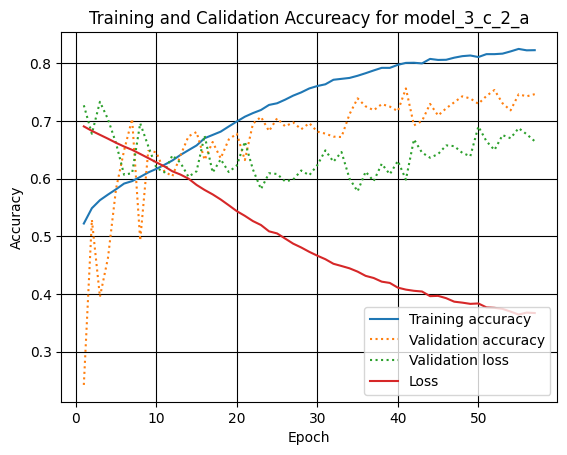

In [24]:
printGraph("Training and Calidation Accureacy for model_3_c_2_a", hist)

228/228 [==============================] - 0s 1ms/step


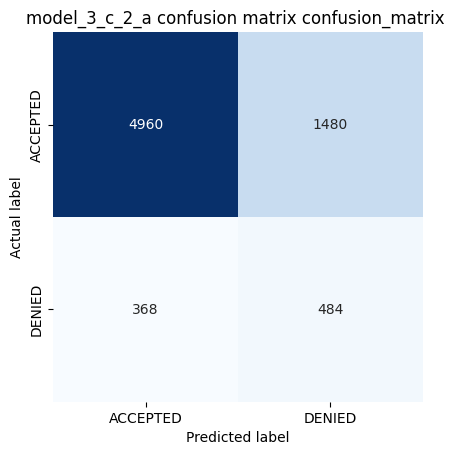

In [25]:
printConfusionMatrix(model_3_c_2_a,x_test,y_test,name="model_3_c_2_a confusion matrix")

In [26]:
hist = model_3_c_2_b.fit(x_train_s,y_train_s, epochs=200, validation_data=(x_test, y_test), batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/200
402/402 [==============================] - 5s 8ms/step - loss: 0.6926 - accuracy: 0.5109 - val_loss: 0.6976 - val_accuracy: 0.3770
Epoch 2/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6873 - accuracy: 0.5436 - val_loss: 0.6858 - val_accuracy: 0.4704
Epoch 3/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6811 - accuracy: 0.5569 - val_loss: 0.7272 - val_accuracy: 0.4789
Epoch 4/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6748 - accuracy: 0.5669 - val_loss: 0.6365 - val_accuracy: 0.6997
Epoch 5/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6678 - accuracy: 0.5776 - val_loss: 0.6493 - val_accuracy: 0.6404
Epoch 6/200
402/402 [==============================] - 3s 8ms/step - loss: 0.6619 - accuracy: 0.5867 - val_loss: 0.7031 - val_accuracy: 0.5125
Epoch 7/200
402/402 [==============================] - 3s 7ms/step - loss: 0.6552 - accuracy: 0.5912 - val_loss: 0.6544 - val_accuracy: 0.5964

ACCURACY:         0.8191518187522888 
VAL ACCURACY:     0.7264125347137451 
VAL LOSS:         0.6548910737037659


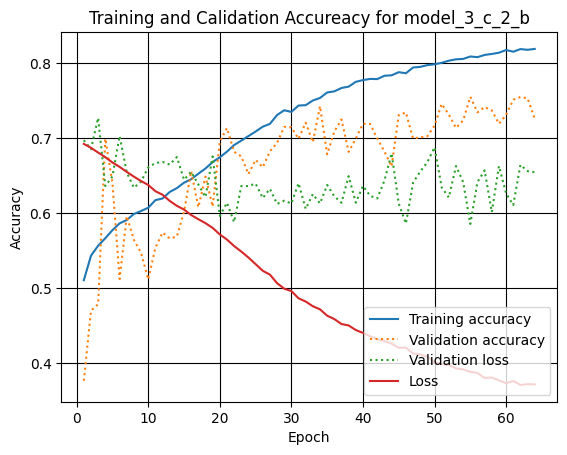

In [27]:
printGraph("Training and Calidation Accureacy for model_3_c_2_b", hist)

228/228 [==============================] - 1s 3ms/step


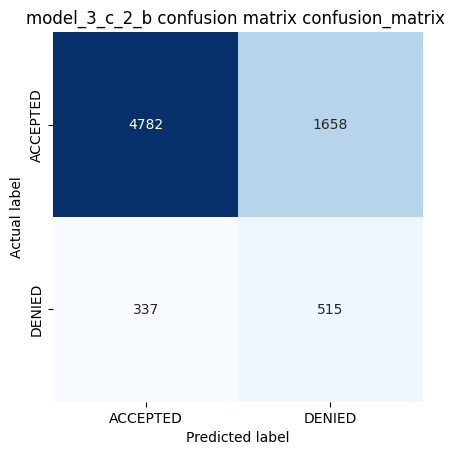

In [28]:
printConfusionMatrix(model_3_c_2_b,x_test,y_test,name="model_3_c_2_b confusion matrix")

In [29]:
#model_3_c_2_b.save("../saved_models/")

228/228 [==============================] - 1s 2ms/step


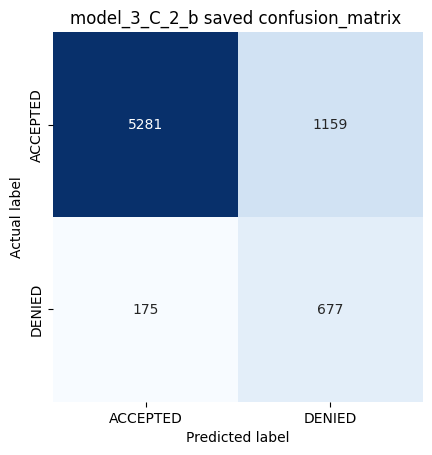

In [38]:
temp_model = keras.models.load_model("../saved_models/model_4_B_copy_b/")


printConfusionMatrix(temp_model,x_test,y_test, name="model_3_C_2_b saved")

228/228 [==============================] - 1s 3ms/step


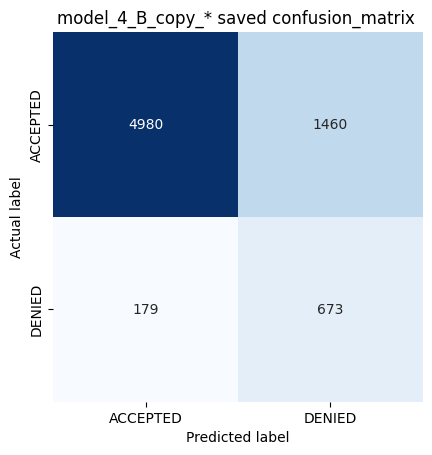

In [31]:
temp_model = keras.models.load_model("../saved_models/model_3_c_2_b/")


printConfusionMatrix(temp_model,x_test,y_test, name="model_4_B_copy_* saved")

In [40]:
model_3_c_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_A (Dense)             (None, 512)               6144      
                                                                 
 layer_B (Dense)             (None, 512)               262656    
                                                                 
 layer_C (Dense)             (None, 256)               131328    
                                                                 
 layer_D (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 416,641
Trainable params: 416,641
Non-trainable params: 0
_________________________________________________________________


model_3_c_1

3 hidden layers with 256 nodes

loss: 0.3614 - accuracy: 0.8279 - val_loss: 0.5912 - val_accuracy: 0.7647

---------------------------------------------------------------------------------------------------------------------------

model_3_c_2

5 hidden layers with 256 nodes

loss: 0.3513 - accuracy: 0.8314 - val_loss: 0.6745 - val_accuracy: 0.7623


---------------------------------------------------------------------------------------------------------------------------

model_3_c_3

4 hidden layers 2 with 512 nodes, 

		1 with 256 nodes, 

		1 with 64 nodes

loss: 0.3465 - accuracy: 0.8332 - val_loss: 0.6345 - val_accuracy: 0.7434



---------------------------------------------------------------------------------------------------------------------------


model_3_c_2_leaky

5 hidden layers with 256 nodes with a leaky activation

loss: 0.4922 - accuracy: 0.7473 - val_loss: 0.7101 - val_accuracy: 0.6089


---------------------------------------------------------------------------------------------------------------------------

model_3_c_2_a

6 hidden layers with 256 nodes with relu activation

loss: 0.3770 - accuracy: 0.8177 - val_loss: 0.6901 - val_accuracy: 0.7449


---------------------------------------------------------------------------------------------------------------------------

model_3_c_2_b

9 hidden layers with 256 nodes

loss: 0.3867 - accuracy: 0.8099 - val_loss: 0.6373 - val_accuracy: 0.7721
